# Detection Of Diabetes Using Deep Learning Model (Neural Networks)

This project is intended to build a simple model that predicts if a person might be suffering from Diabetes Mellitus. For this purpose we have used a deep learning model with 3 layers. We have used Keras library for this purpose.

## Diabetes And Its Effects

Diabetes is among one of the most common and widespread diseases in the world at present. Currently around 10.5% of global population suffers from Diabetes Mellitus (Type 2). Recently it has been observed that this disease is also rapidly growing in adolescents and early age adults. Diabetes can be genetic too which means that a person has a high risk of developing diabetes if it runs in the family history. It is a lifestyle disease and can can create severe consequences if not detected early and treated properly. Diabetes has a direct impact on functioning of heart and kidneys. Such prolonged effects can lead to cardiovascular diseases, blood pressure problems and failure of kidneys. In 2020, according to the International Diabetes Federation (IDF), 463 million people have diabetes in the world and 88 million people in the Southeast Asia region. Of this 88 million people, 77 million belong to India. The prevalence of diabetes in the population is 8.9%, according to the IDF. Thus this issue is an alarming one. One of the reasons is also that many people go untested or do not properly take a treatment for this problem. This model using only some primary features, tries to detect diabetes or chances of diabetes.

## Data Sources

For this model we have used the data from Pima Indians Diabetes Database. Link : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Exploratory Data Analysis (EDA)

In [200]:
# Importing standard libraries used for EDA 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
# Reading Data and display of some part of it
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [202]:
# Brief description of data
diabetes_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

The above dataset contains a history of 768 patients who were tested over 8 different parameters clinically and the result of the test is in the 9th column. The 8 Parameters used are :
* Age  : Age of the patient
* Pregnancy : Number of times a patient was pregnant.
* Glucose Level : The glucose content in the blood at the time of test. This is random GL test value.
* Blood Pressure : Diastolic Pressure.
* Skin Thickness : the depth of the skin tissue (uptil epiderma).
* Insulin : Insulin level in the blood.
* BMI : Body Mass Index ( A measure of body fat based on height and weight of the patient ).
* DiabetesPedigreeFunction : A measure of likelihood of diabetes based on family history.


In [203]:
# Creation of feature and result dataframe
diabetic_features = diabetes_data.drop('Outcome',axis = 1)
diabetic_diagnosis = diabetes_data['Outcome']

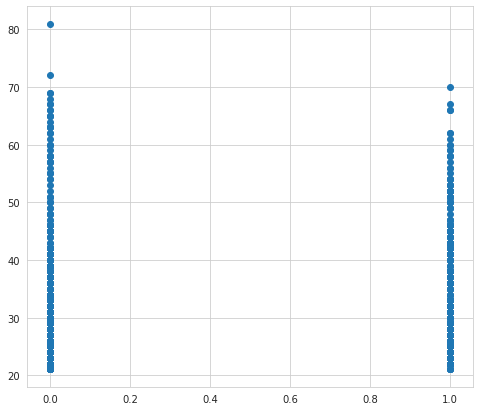

In [204]:
# Let's plot some graphs to see how much correlation lies between parameters and result of diabetic test
plt.rcParams["figure.figsize"] = (8,7)
sns.set_style('whitegrid')
plt.scatter(diabetic_diagnosis,diabetic_features['Age'])

We can see that people having diabetes have a varying range of age starting from bottom 20 going upto 70 which shows a great amount of concern that even young people are diseased with diabetes.

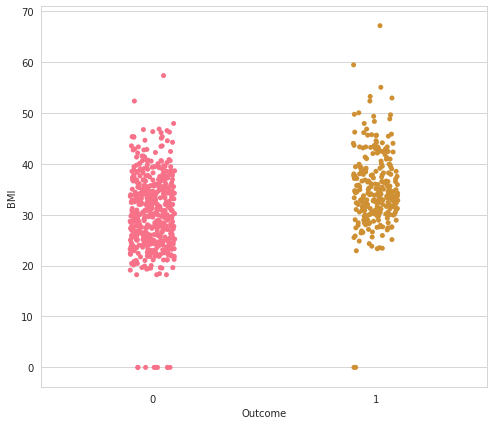

In [205]:
# Lets look at relation between BMI and Diabetic Outcomes
sns.stripplot(x = diabetes_data['Outcome'],y = diabetes_data['BMI'],data = diabetes_data,palette=sns.color_palette("husl", 8))

We see that BMI does not tells much if a person would suffer from Diabetes or not because normal people as well as
our patients both have nearby about the same Body Mass Index.

People having diabetes : 268
People that have pedigree measure greater than 0.30 and have diabetes : 186


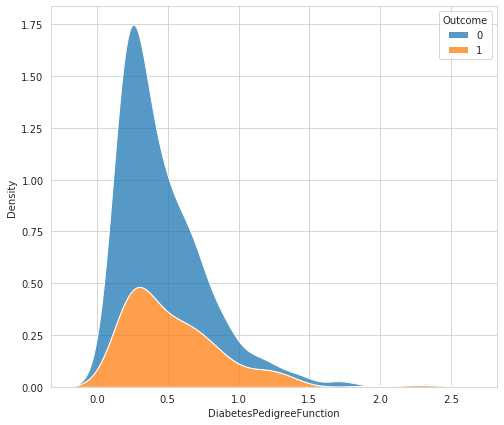

In [206]:
# Lets look what a person's ancestral line / pedigree can predict about a person to suffer from Diabetes
sns.kdeplot(x = diabetes_data['DiabetesPedigreeFunction'],hue = diabetes_data['Outcome'],data = diabetes_data,multiple='stack')
print("People having diabetes :",diabetes_data[diabetes_data['Outcome']==True]['Outcome'].count())
print("People that have pedigree measure greater than 0.30 and have diabetes :",diabetes_data[(diabetes_data['Outcome']==True) & (diabetes_data['DiabetesPedigreeFunction']>=0.30)]['Outcome'].count())

From above distribution we can say that if diabetes runs in the ancestral line, then it is highly possible for a person to inherit this trait and be diagnosed for diabetes in future. About 69.4% patients of total patients had pedigree score greater than 0.30 and also had diabetes. We have taken 0.30 as the lower bound for diabetic people cause from above graph, we can see that most of the patients we had, had mostly 0.30 as pedigree score. While this result can be biased because people with low score have also become a victim of diabetes while people with high scores as 1.9 do not have diabetes.

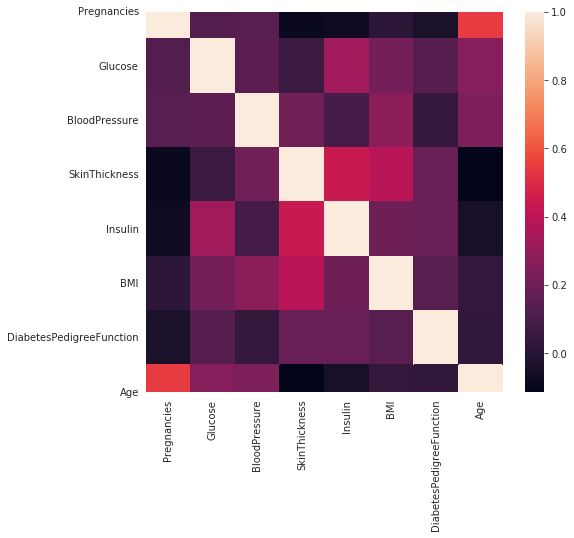

In [207]:
# Let us try to look for some correlations between the features
sns.heatmap(diabetic_features.corr())

We can see that there is a good amount of correlation between age and pregnancy frequency but actually they are not causal of one another because pregnancy frequency is dependent on an individual patient. While both age and pregnancy can trigger diabetic symptoms. Rest of the factors do not show a significant amount of correlation ( Insulin and Glucose show inverse correlation as Insulin affects the level of Glucose in blood ).

## Model Building, Training And Testing

We have used a simple sequential model with 3 Layers of connectivity. The first input layer has 8 input features and 12 Neurons with ReLu as the activation function of this layer(Rectified Linear Unit), the second hidden layer has 8 Neurons with ReLu as the activation function. The Final layer or the output layer has only 1 Neuron and uses sigmoid function for activation as its a binary type classification (Yes/No).

In [208]:
# Creating Model
from keras.models import Sequential as sq
from keras.layers import Dense as ds
model = Sequential()
model.add(Dense(12,input_dim = 8,activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [209]:
# Compiling Model. We are going to use Binary Cross Entropy for the loss function and adam for optimiser.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [213]:
# Fitting/Training Model. Our Model will make 70 epochs and updates would be done after every 3 examples
model.fit(diabetic_features,diabetic_diagnosis,epochs=100,batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 3ms/step - loss: 0.5003 - accuracy: 0.7539
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7526
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7526
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.7617
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7513
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.7500
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7891
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.7617
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7513
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4961 - accura

154/154 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7799
Epoch 82/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7734
Epoch 83/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7695
Epoch 84/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7969
Epoch 85/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.7826
Epoch 86/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.7852
Epoch 87/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.7930
Epoch 88/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7839
Epoch 89/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7865
Epoch 90/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4590 - accuracy: 

In [214]:
# Accuracy Of the Model
_,accuracy = model.evaluate(diabetic_features, diabetic_diagnosis)
print("Model accuracy : %.9f"% (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.7760
Model accuracy : 77.604168653


In [215]:
# Calculation Of Predictions (values in this dataframe lie between 0 and 1 (real value))
diabetic_report = model.predict(diabetic_features)
print([round(x[0]) for x in diabetic_report])

24/24 [==============================] - 0s 2ms/step
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

# THANK YOU